In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine,inspect
import matplotlib.pyplot as plt
%matplotlib inline

engine = create_engine('postgresql://localhost:5432/Employees_db')
connection = engine.connect()



In [2]:
inspector = inspect(engine)
inspector.get_table_names()

['Department', 'Dept_emp', 'Dept_manager', 'Employees', 'Salaries', 'Titles']

In [3]:
salary = pd.read_sql('select * from "Salaries"', connection).drop_duplicates("Emp_no")
salary_df = pd.DataFrame(salary)
emp_salary = salary_df.drop(["From_date", "To_date"], axis = 1)
emp_salary.head()

,Emp_no,Salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [4]:
title = pd.read_sql('select * from "Titles"', connection).drop_duplicates("Emp_no")
title_df = pd.DataFrame(title)
emp_title = title_df.drop(["From_date", "To_date"], axis = 1)
emp_title.head()

,Emp_no,Title
0,10001,Senior Engineer
1,10002,Staff
2,10003,Senior Engineer
3,10004,Engineer
5,10005,Senior Staff


In [5]:
merge_df = pd.merge(emp_salary, emp_title, how = "left", on = "Emp_no")
merge_df.head()

,Emp_no,Salary,Title
0,10001,60117,Senior Engineer
1,10002,65828,Staff
2,10003,40006,Senior Engineer
3,10004,40054,Engineer
4,10005,78228,Senior Staff


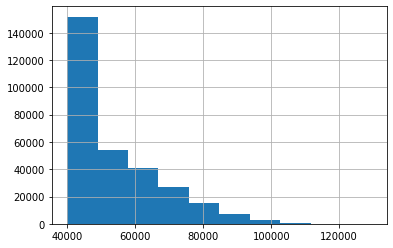

In [9]:
merge_df.Salary.hist()
plt.savefig("hist")

In [7]:
data = merge_df.groupby('Title').mean()['Salary']
df = pd.DataFrame(data)
df

,Salary
Title,
Assistant Engineer,48493.204786
Engineer,48547.807738
Manager,51531.041667
Senior Engineer,48425.490299
Senior Staff,58503.840270
Staff,58433.367386
Technique Leader,48582.896092


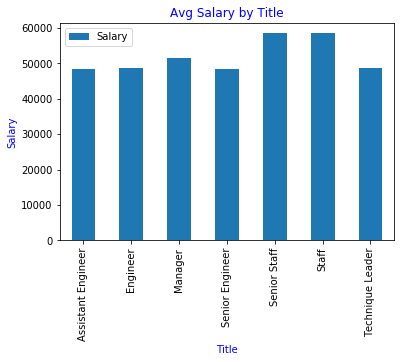

In [8]:
df.plot.bar()

plt.xlabel("Title", color='b')
plt.ylabel("Salary", color='b')
plt.title("Avg Salary by Title", color='b')
plt.savefig("barplot")